In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Load and clean the dataset

In [34]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/e-mail_spam_detection.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['v1']=df['v1'].map({'ham': 0, 'spam': 1})
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Visualize the difference

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

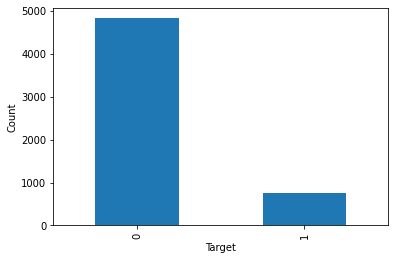

In [40]:
df['v1'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#research how to change the 0 and 1 on the graph for better understanding

Bag of words

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
texts = cv.fit_transform(df['v2'])

Split the data

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(texts, df['v1'], test_size=0.3, random_state=1)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

def print_results(y_pred):
  print("Accuracy: {}".format(accuracy_score(y_test, y_pred)) )
  print("Precision: {}".format(precision_score(y_test, y_pred)) )
  print("Recall: {}".format(recall_score(y_test, y_pred)))
  print("F1: {}".format(f1_score(y_test, y_pred)))

  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm,['not_spam','spam'], ['P_NOT_SPAM','P_SPAM'])
  plt.figure(figsize=(10,7))
  sns.set(font_scale=1)# for label size
  sns.heatmap(df_cm, annot=True,fmt='d') # font size
  plt.show()

Random Forest

Accuracy: 0.9754784688995215
Precision: 1.0
Recall: 0.8119266055045872
F1: 0.8962025316455697


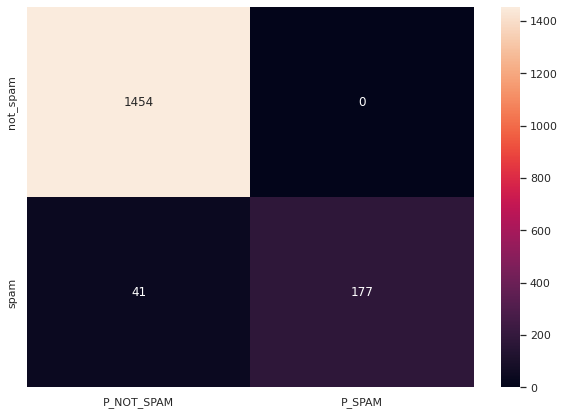

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print_results(y_pred_rfc)

Multi-layer Perceptron

Accuracy: 0.9808612440191388
Precision: 1.0
Recall: 0.8532110091743119
F1: 0.9207920792079208


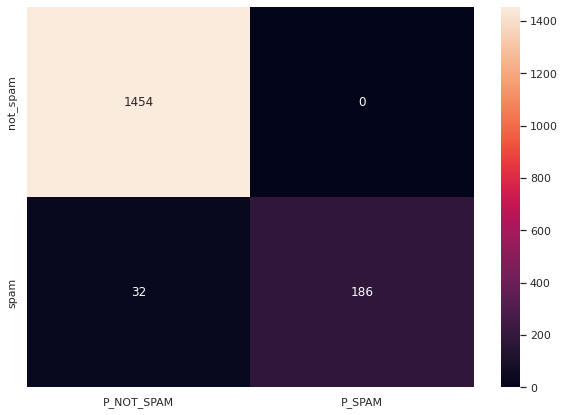

In [83]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_mlp=mlp.predict(X_test)
print_results(y_pred_mlp)

In [88]:
text = ['NIGERIAN PRINCE HAS HUGE OFFER', 'Someone logged into your facebook account on Sat, 05 Mar 2022 20:13:23 +0000 using Google Pixel 4a. we just wanted to make sure it was you! If you dont think this was you. please report this so we can keep your account safe.']
aux_text = cv.transform(text)
aux = mlp.predict(aux_text)
aux

array([0, 0])

Oh well...